# Quicksort Algorithm

In [ ]:
class Node:
    def __init__(self, xx, **kwargs):
        self.xx = xx


def quickSort(nodes, axis, **kwargs):
    # Copy nodes to new array
    N = len(nodes)
    nodes_sorted = []
    index_sorted = []
    for i, n in enumerate(nodes):
        nodes_sorted.append(n)
        index_sorted.append(i)
    
    # Sort nodes
    qs_sort(nodes_sorted, index_sorted, 0, N-1, axis)
    
    # Return nodes
    direction = kwargs.get('direction', 'ascend')
    if (direction == 'descend'):
        return (nodes_sorted[::-1], index_sorted[::-1])
    else:
        return (nodes_sorted, index_sorted)
    
    
def qs_sort(nodes, index, low, high, axis):    
    if (low < high):
        pi = qs_partition(nodes, index, low, high, axis)
        qs_sort(nodes, index, low, pi - 1, axis)
        qs_sort(nodes, index, pi + 1, high, axis)
    
    
def qs_partition(nodes, index, low, high, axis):
    pivot = nodes[high]
    i = low - 1
    
    for j in range(low, high):
        if (nodes[j].xx[axis] <= pivot.xx[axis]):
            i += 1
            nodes[i], nodes[j] = nodes[j], nodes[i]
            index[i], index[j] = index[j], index[i]
        
    nodes[i+1], nodes[high] = nodes[high], nodes[i+1]
    index[i+1], index[high] = index[high], index[i+1]
    
    return i+1

# kd-Tree

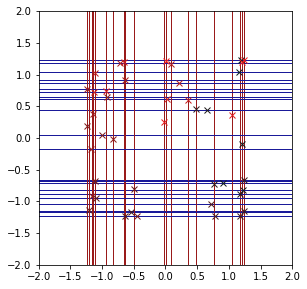

In [137]:
class TreeNode:
    def __init__(self, location, leftChild, rightChild):
        self.location   = location
        self.leftChild  = leftChild
        self.rightChild = rightChild
        
def kDTree(nodes, depth):
    if (len(nodes) < 1):
        return None
    
    # Select axis based on depth
    axis = depth % 2
    
    # Sort points in list and choose median point
    N = len(nodes)
    (sNodes, iNodes) = quickSort(nodes, axis=0, direction='descend')
    median = int(N/2)

    leftChilds = []
    for i in range(0,median):
        leftChilds.append(nodes[iNodes[i]])
    rightChilds = []
    for i in range(median+1,len(iNodes)):
        rightChilds.append(nodes[iNodes[i]])
    
    node = TreeNode(nodes[iNodes[median]], 
                    kDTree(leftChilds, depth+1),
                    kDTree(rightChilds, depth+1))

    return node
   
    
def plot_kDTree(treeNode, ax, depth):
    if (treeNode == None):
        return ax
    
    loc  = treeNode.location
    axis = depth % 2
    xx   = loc.xx[axis]
    
    if (axis == 0):
        ax.plot([xx, xx], [-2,2], 
                ls='-', lw=1.0, c=[.6,.1,.1])
    else:
        ax.plot([-2,2], [xx,xx], 
                ls='-', lw=1.0, c=[.1,.1,.6])
    
    ax = plot_kDTree(treeNode.leftChild, ax, depth+1)
    ax = plot_kDTree(treeNode.rightChild, ax, depth+1)
    
    return ax
    
    
def main():
    
    # Create nodes
    import numpy as np
    nodes = []
    N     = 44
    for n in range(0,N):
        xi = 1.234 * np.sin(2.0 * np.pi * n/N + 2*np.random.rand(1)[0] ) 
        yi = 1.234 * np.cos(2.0 * np.pi * n/N + 2*np.random.rand(1)[0] )  
        nodes.append(Node(xx=(xi,yi)))
    
    # Sort nodes
    (sNodes, iNodes) = quickSort(nodes, axis=0, direction='descend')
    
    
    # Create 2D-Tree of nodes
    tree = kDTree(nodes, 0)        
    
    # Plot nodes
    from matplotlib import pyplot as plt
    fig = plt.figure()
    fig.set_size_inches(10,5)
    ax1 = fig.add_subplot(121)
    ax1.set_aspect('equal')    
    
    # Plot tree
    ax1 = plot_kDTree(tree, ax1, 0)
    
    # Plot nodes
    for i, n in enumerate(nodes):
        ax1.plot(n.xx[0], n.xx[1], ls='None', marker='x', c=[i/len(nodes),.1,.1])
    
    
    ax1.set_xlim([-2,2])
    ax1.set_ylim([-2,2])
    
    plt.show()
    

main()
    
    